# Isabella Mendoza

## Research question/interests

I'm interested in the possible correlation between medical expenses and an the patient's age. By comparing the two, I'll be able to see which ages supposedly experiences more severe health issues as it correlates to their expenses. I'd also like to look at the role that an individual's BMI and smoking habits play in this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Milestone 3
## Task 1: EDA

To start, I'll look at the general trends in the overall dataframe. Then, I can narrow it down to the useful columns.

In [4]:
df.shape

(1338, 7)

In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Knowing how many unique values there are will give me a general idea of the age and BMI range. I will not be needing the region columns as it is irrelevant to my chosen research questions.
I'm primarily interested in the age, BMI, and charges columns.

Text(0.5, 1.0, 'Correlation strength between all columns')

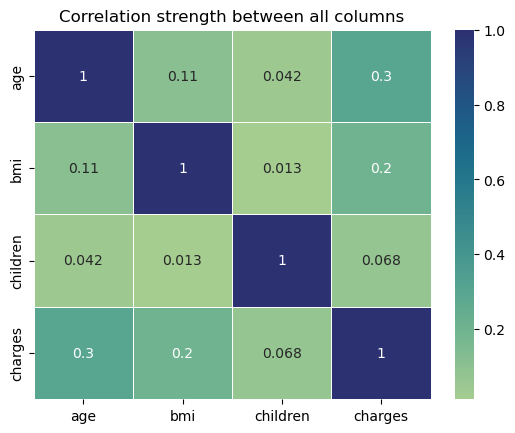

In [8]:
df_mx = df.corr()
sns.heatmap(df_mx, annot=True, linewidth = 0.5, cmap = "crest")
plt.title("Correlation strength between all columns")

This heatmap shows that there is a strong relation between age and charges which is what I am focusing on. There is also an evident correlation between BMI and charges.

Knowing this, I can focus on the these three qualities, charge, age, and BMI with some more graphs.

Text(0.5, 1.0, 'Correlation between Age and BMI')

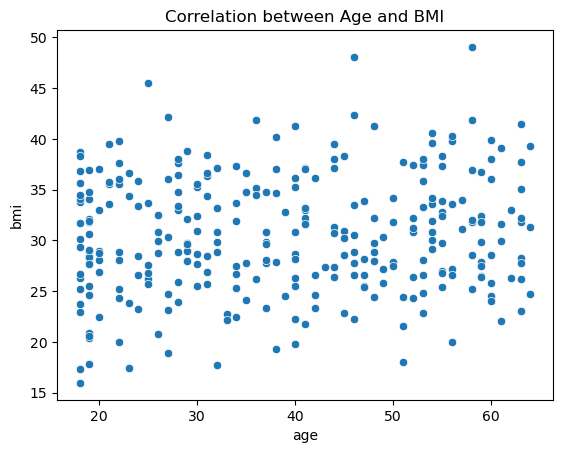

In [43]:
df2 = df.head(300)
sns.scatterplot(data = df2, x ='age', y = 'bmi')
plt.title("Correlation between Age and BMI")

Even with a subset of the dataframe, this scatterplot indicates that there is no age that has a signifcantly different higher or lower average BMI compared to other age groups. This leads to the assumption that BMI does not necessarily have a direct influence.

Now I can analyze the range of expenses on its own to see which amounts are more common. I can then compare the common expense range to common age range.

Text(0.5, 1.0, "Range of Expenses and Each One's Count")

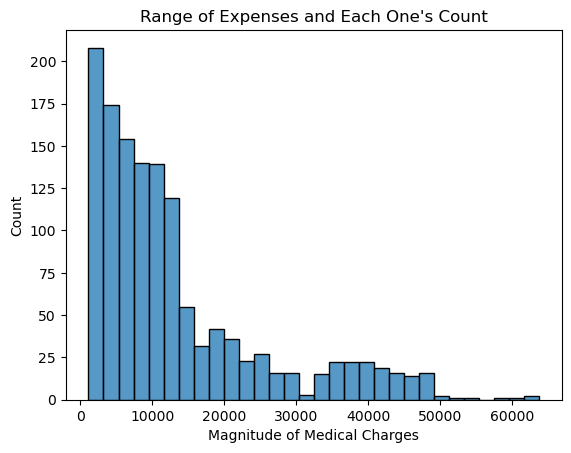

In [42]:
sns.histplot((df['charges']), bins=30)
plt.xlabel("Magnitude of Medical Charges")
plt.title("Range of Expenses and Each One's Count")

This histogram of the overall medical charges clearly shows that the majority of patients are charged between \\$0 to \\$10 000. As the expenses gets higher, the number of people charged that amount become lower.

The minimum charge is around \\$1000 with the maximum charge recorded being just over \\$60000.

I can also look at the same data, most common charge range, with a density plot.

Text(0.5, 1.0, "Range of Expenses and each one's Density")

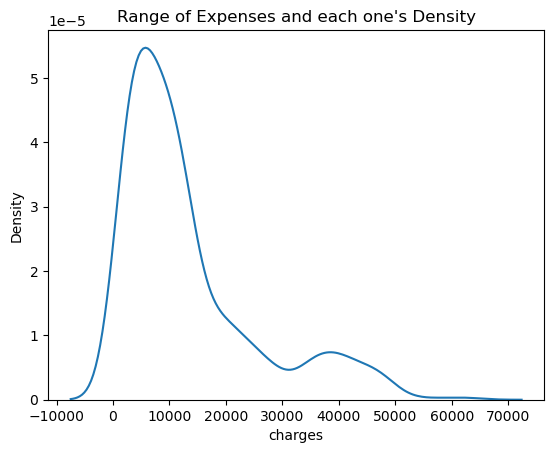

In [25]:
sns.kdeplot(df['charges'])
plt.title("Range of Expenses and each one's Density")

From this graph, it is very clear that the majority of recorded patient's expenses fall at around the \\$10000 mark.

I can also look at the most common age range.

Text(0.5, 1.0, 'Ages Recorded')

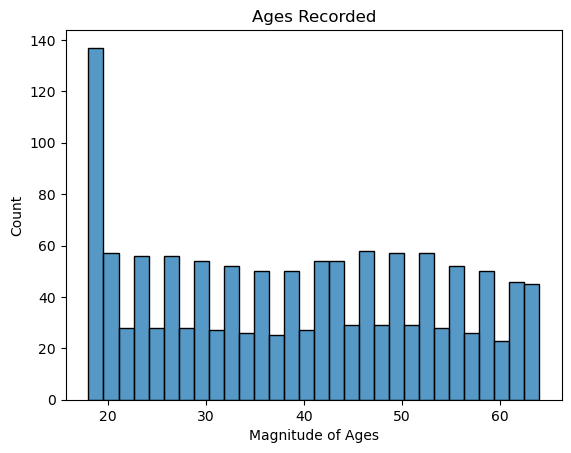

In [26]:
# sns.violinplot(x = 'charges', y = 'age', data = df)
# plt.title("Comparison of Patient Age against their Expenses")

sns.histplot((df['age']), bins=30)
plt.xlabel("Magnitude of Ages")
plt.title("Ages Recorded")

From this graph, we can see that the most common age in our dataframe is just under 20. Besides the youth, it looks like most of the patients were at even numbered ages (30, 32-34, 40, 50 etc.). However, this may be on purpose just to make the data easier to work with. 

Now that I've gotten some insight into the over-arching trends of our data frame, I can hone in a little closer on my interest in the relationship between expenses and age.
I now have a good grasp on the different trends in our dataset, specifically, the ones that I am interested in.

# Task 2: Data Analysis Pipeline

Step 1: Load Data (Part of EDA)
<br />
Step 2: Clean and Revise Data
- After looking at the different trends in Task 1, I know which trends and columns I'd like to focus on. Therefore, I can remove irrelevant ones like region, children, and sex.

In [27]:
df = pd.read_csv("../data/raw/insurance/insurance.csv")
dfClean = df.copy().drop(['region','children', 'sex'], axis=1).dropna(axis=0)
dfClean.reset_index()
dfClean.head()
dfClean

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


To make the data simpler and easier to compare, I'll change the smoker column to 1 or 2 for yes or no respectively.

In [28]:
dfClean['smoker'] = dfClean['smoker'].map({'yes': 1, 'no': 0})
dfClean

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


Furthermore, I can round my charges so that the values are more realistic in terms of money as well as round the bmi. This makes both values easier to manage.

In [29]:
dfClean['bmi'] = dfClean['bmi'].round(decimals = 2)
dfClean['charges'] = dfClean['charges'].round(decimals = 2)
dfClean


,age,bmi,smoker,charges
0,19,27.90,1,16884.92
1,18,33.77,0,1725.55
2,28,33.00,0,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86
...,...,...,...,...
1333,50,30.97,0,10600.55
1334,18,31.92,0,2205.98
1335,18,36.85,0,1629.83
1336,21,25.80,0,2007.94


# Task 3: Method Chaining

In this task, I will combine the steps I used to get my desired dataframe into a separate function in a new .py file. This will keep the processing and cleaning of the dataframe fast and easy.

In [30]:
"""
BEFORE GROUPING AS FUNCTIONS AND COPYING TO NEW PY FILE
def load_and_process("../data/raw/insurance/insurance.csv"):
    
    df = pd.read_csv("../data/raw/insurance/insurance.csv")
    dfClean = (df.copy()
                .drop(['region','children', 'sex'], axis=1)
                .dropna(axis=0)
          )
    dfClean['smoker'] = dfClean['smoker'].map({'yes': 1, 'no': 0})
    dfClean['bmi'] = dfClean['bmi'].round(decimals = 2)
    dfClean['charges'] = dfClean['charges'].round(decimals = 2)
    
    return dfClean
"""
import project_functions2 as p2

In [31]:
cleanData = p2.load_and_process("../data/raw/insurance/insurance.csv")
cleanData

,age,bmi,smoker,charges
0,19,27.90,1,16884.92
1,18,33.77,0,1725.55
2,28,33.00,0,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86
...,...,...,...,...
1333,50,30.97,0,10600.55
1334,18,31.92,0,2205.98
1335,18,36.85,0,1629.83
1336,21,25.80,0,2007.94


This is exactly what I was looking to do to clean up the data that I am working with.

# Task 4: Data Analysis

During my EDA, all of the visualizations I chose gave me insight into the overarching trends and themes within our dataset. The violin plot with charges against age clearly showed the trend that I was wanting to represent. However, although the trendline is well-represented, the charges are clumped which makes the specifics hard to read. Therefore, I will use and analyze a scatterplot for a detailed conclusion.

With a scatterplot, I will also be able to look at BMI and smoking as possible causes for these charges.

Text(0.5, 1.0, 'Fig. 1 (Comparison between a Patients Charges and Expenses)')

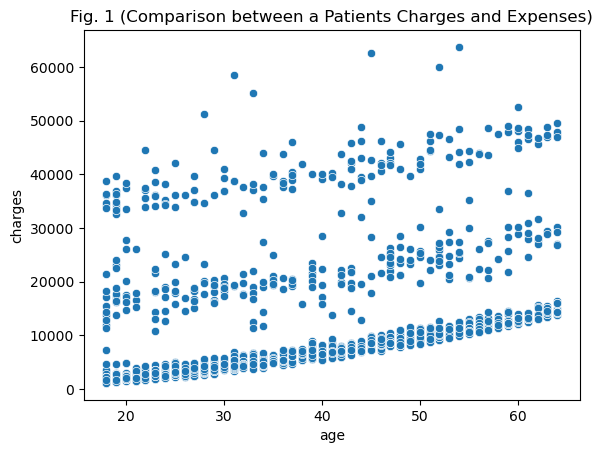

In [34]:
sns.scatterplot(data = cleanData, x ='age', y = 'charges')
plt.title('Fig. 1 (Comparison between a Patients Charges and Expenses)')

Fig.1 above shows the relationship between an individual's age and their medical charges. There are clearly three sections that are most common in charges with the majority of people falling within the 0 - 10 000 range shown by that cluster. I would consider the second group to be between \\$10 000 to \\$25 000 and the third to be \\$30 000 to \\$40 000 with a few cases > \$40 000 USD. However, there is a steady growth between all three groupings showing how a patient's age is coincident with their charges. The older someone gets, the higher their expenses will most likely be.

Using the same plot, I can add BMI in as a factor and see if that had a visible impact.

Text(0.5, 1.0, 'Fig. 2 (Comparison between a Patients Charges and Expenses, Separated by BMI)')

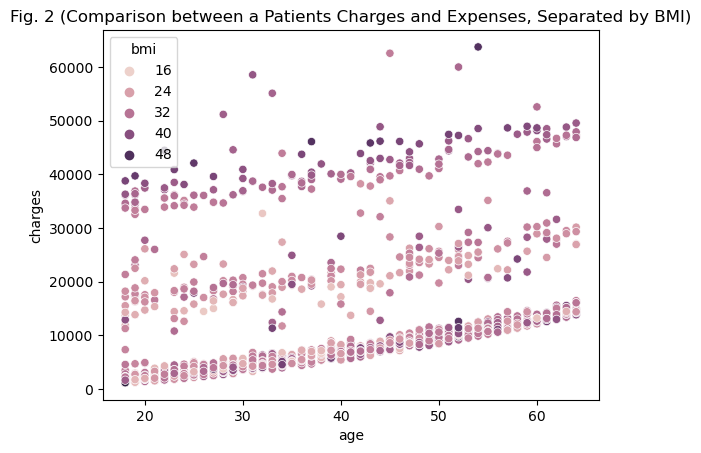

In [35]:
sns.scatterplot(data = cleanData, x ='age', y = 'charges', hue = 'bmi')
plt.title('Fig. 2 (Comparison between a Patients Charges and Expenses, Separated by BMI)')

Fig. 2 color coordinates the data points by rounded BMI values and sorts them by the most common ranges found in the dataframe. This separation makes it much easier to differentiate points as well as see the BMI trends compared to both age and charges.

Text(0.5, 1.0, 'Fig. 3 (Relationship between Age and Smoking Habits)')

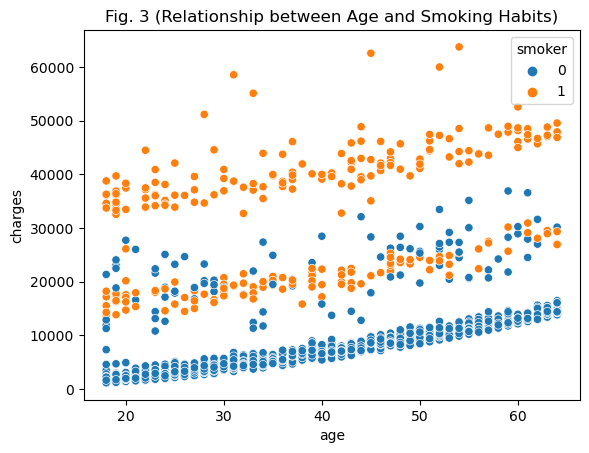

In [36]:
sns.scatterplot(data = cleanData, x ='age', y = 'charges', hue = 'smoker')
plt.title('Fig. 3 (Relationship between Age and Smoking Habits)')

Fig. 3 does that same as Fig. 2 in that it also groups data points by a commonality. Here, I chose to color them based on whether or not the person was a smoker. Clearly, no matter the age, the overall trend is that smoking led to a higher charge.

### Conclusion

The above three visualizations help me examine and answer my research question: Do medical charges rise as a person ages? And is it possible that their BMI or smoking habits may have influenced that?

Fig. 1 answers the central question concerning age and charges. The rising trendline is consistent throughout the three groups that were defined earlier. It is safe to conclude that the younger a person is, the lower their expenses are compared to others receiving the same treatments and costs. This is the common trendline that represents the proportional relationship between age and charge, whether that be because of age and the health issues that come with it or outside conditions.

That answers my first question, but what role do BMI and smoking have here?

The lower group's lighter colour in Fig. 2 illustrates how people charged under \$10 000 have a BMI of around 16 to 30. As you move upwards in charge, this colour gets darker, with those with the highest record charges having a BMI of over 40. Regardless of age, the higher BMI one has, the higher their medical expenses tend to be. However, this does not entirely prove that BMI is a direct cause of these people's health issues but is instead a possibility.

Furthermore, Fig. 3 establishes that smoking does play a massive role in influencing charges regardless of age. Anyone charged under \\$10 000 is not a smoker, and all those above that charge are. The distinction in this graph is more straightforward compared to the BMI one.

After gathering this information, it is clear that age is proportional to medical expenses. Some young patients with charges over \\$45 000 may be due to other medical conditions, but overall, the relationship is consistent and medical expenses rise with age. Those with a BMI over 30 consistently pay higher charges than those with a lower BMI. Furthermore, smokers continue to be charged up to \\$50 000 more than non-smokers.